In [1]:
# predicting stock prices modeling doesnt require much in the way of preprocessing
# moving forward with modeling, linear regression, ARMA, potentially LSTM

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data for linear regression
df2 = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df2.csv')
df2.describe()

,Adj Close
count,1241.000000
mean,54.182417
std,26.097082
min,7.100000
25%,36.090000
50%,46.400002
75%,74.860001
max,119.489998


In [4]:
!pip install fastai==2.6.3

from fastai.tabular.all import  add_datepart
add_datepart(df2, 'Date')
df2.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
df2.head()

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,20.650000,2017,5,20,16,1,136,False,False,False,False,False,False
1,20.225000,2017,5,20,17,2,137,False,False,False,False,False,False
2,19.950001,2017,5,20,18,3,138,False,False,False,False,False,False
3,19.700001,2017,5,20,19,4,139,False,False,False,False,False,False
4,20.450001,2017,5,21,22,0,142,False,False,False,False,False,False


In [5]:
df2['Mon_Fri'] = 0
df2['Mon_Fri'] = df2['Dayofweek'].apply(lambda x: True if (x == 0 or x == 4) else x == 0) 
df2['Mon_Fri'].unique()
df2.head(20)

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Mon_Fri
0,20.650000,2017,5,20,16,1,136,False,False,False,False,False,False,False
1,20.225000,2017,5,20,17,2,137,False,False,False,False,False,False,False
2,19.950001,2017,5,20,18,3,138,False,False,False,False,False,False,False
3,19.700001,2017,5,20,19,4,139,False,False,False,False,False,False,True
4,20.450001,2017,5,21,22,0,142,False,False,False,False,False,False,True
5,20.549999,2017,5,21,23,1,143,False,False,False,False,False,False,False
6,20.799999,2017,5,21,24,2,144,False,False,False,False,False,False,False
7,20.500000,2017,5,21,25,3,145,False,False,False,False,False,False,False
8,20.549999,2017,5,21,26,4,146,False,False,False,False,False,False,True
9,20.700001,2017,5,22,30,1,150,False,False,False,False,False,False,False


In [6]:
X = df2.drop('Adj Close', axis=1)
y = df2['Adj Close']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae, r2)

10.85914338741839 0.6480807762019811


In [9]:
df2['Predictions'] = model.predict(X)
df2.head()

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Mon_Fri,Predictions
0,20.650000,2017,5,20,16,1,136,False,False,False,False,False,False,False,20.932849
1,20.225000,2017,5,20,17,2,137,False,False,False,False,False,False,False,21.070015
2,19.950001,2017,5,20,18,3,138,False,False,False,False,False,False,False,21.207182
3,19.700001,2017,5,20,19,4,139,False,False,False,False,False,False,True,20.974095
4,20.450001,2017,5,21,22,0,142,False,False,False,False,False,False,True,20.451162


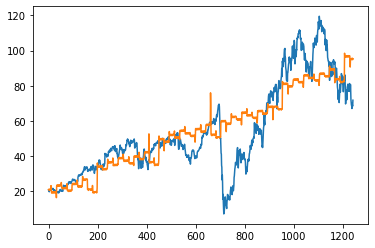

In [10]:
plt.plot(df2[['Adj Close', 'Predictions']])

In [11]:
df2 = pd.read_csv(r'C:\Users\kidne\Springboard\springboardcapstone2\data\interim\df2.csv', parse_dates=['Date'], index_col='Date')
df2 = df2.asfreq('d', method='ffill')
df2

,Adj Close
Date,
2017-05-16,20.650000
2017-05-17,20.225000
2017-05-18,19.950001
2017-05-19,19.700001
2017-05-20,19.700001
...,...
2022-04-15,68.879997
2022-04-16,68.879997
2022-04-17,68.879997


C:\Users\kidne\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\kidne\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


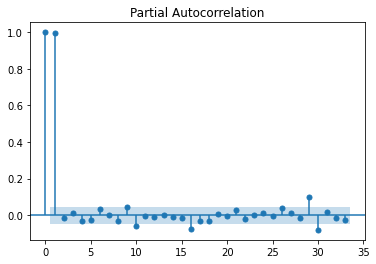

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_pacf(df2['Adj Close']);

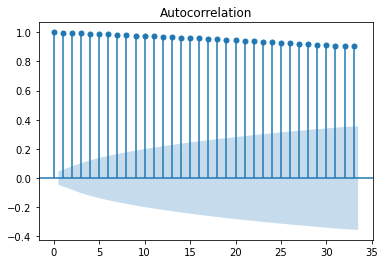

In [13]:
tsa_plots.plot_acf(df2['Adj Close']);

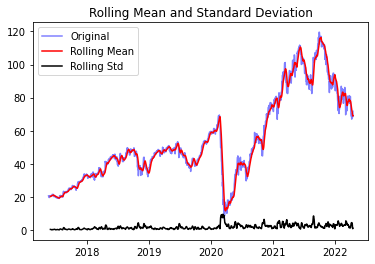

Results of dickey fuller test
Test Statistics                  -1.619567
p-value                           0.472956
No. of lags used                  9.000000
Number of observations used    1790.000000
critical value (1%)              -3.434008
critical value (5%)              -2.863156
critical value (10%)             -2.567630
dtype: float64


In [14]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original', alpha=.5)
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df2['Adj Close'])


nearly 40% chance the null will not be rejected. This is high, also with test stat being greater than all critical values, we have non stationarity in the data. (Null is that non stationarity exists)

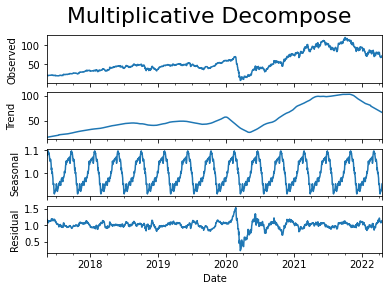

In [15]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Adj Close'], model='multiplicative', extrapolate_trend='freq', period=125)
fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False)
result.trend.plot(ax=axes[1], legend=False)
result.seasonal.plot(ax=axes[2], legend=False)
result.resid.plot(ax=axes[3], legend=False)
fig.suptitle('Multiplicative Decompose', fontsize=22)
axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

plt.show()

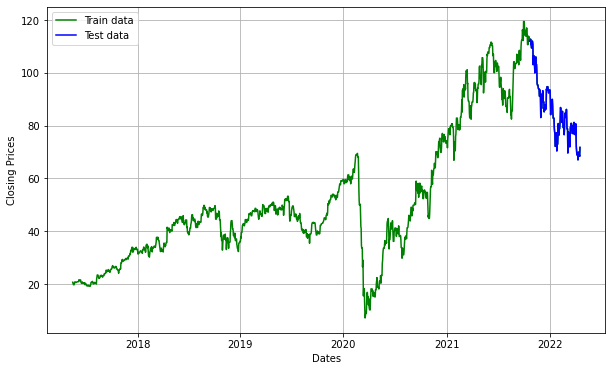

In [16]:
#split data into train and testing set
train_data, test_data = df2[3:int(len(df2)*0.9)], df2[int(len(df2)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df2, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5809.885, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5807.491, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5807.724, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5810.432, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5808.168, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5806.987, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5808.926, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5808.918, Time=0.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5808.518, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5802.969, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5803.225, Time=1.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5803.246, Time=2.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5801.903, Time=1.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5807.708, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0]          

C:\Users\kidne\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


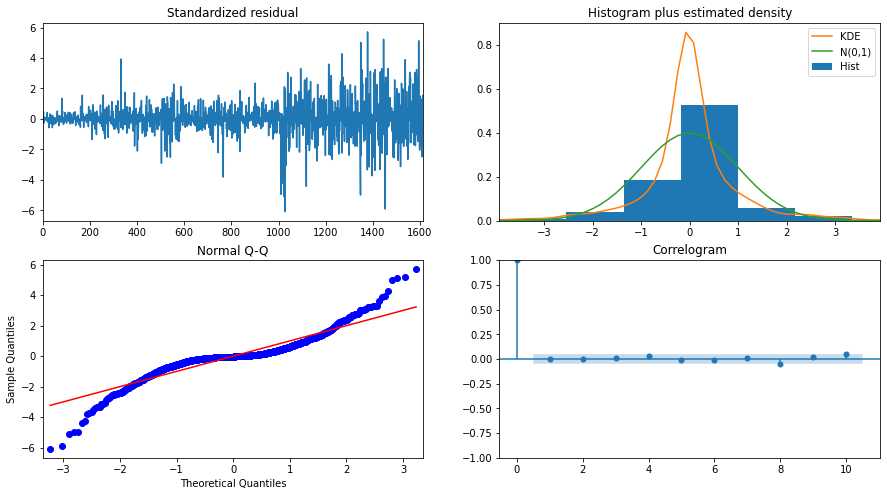

In [17]:
! pip install pmdarima
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [18]:
#Modeling
# Build Model


import statsmodels.api as sm


model=sm.tsa.statespace.SARIMAX(train_data,order=(1, 1, 3),seasonal_order=(0,0,0,0))
fitted =model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1617
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2896.021
Date:                Fri, 03 Jun 2022   AIC                           5802.041
Time:                        03:02:56   BIC                           5828.980
Sample:                    05-19-2017   HQIC                          5812.039
                         - 10-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8956      0.042    -21.166      0.000      -0.978      -0.813
ma.L1          0.9516      0.045     20.937      0.000       0.862       1.041
ma.L2          0.0729      0.022      3.299      0.0

In [23]:
# Forecast
nforecast = len(test_data)
predict = fitted.get_prediction(end=model.nobs + nforecast)
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

In [20]:
fc= fitted.forecast(nforecast)  # 95% conf
conf = fitted.get_forecast(nforecast).conf_int()

,lower Adj Close,upper Adj Close
2021-10-22,110.374734,116.067538
2021-10-23,109.111984,117.391369
2021-10-24,108.052920,118.361378
2021-10-25,107.195508,119.298543
2021-10-26,106.420562,120.002066
...,...,...
2022-04-15,71.820066,154.636305
2022-04-16,71.702423,154.753949
2022-04-17,71.585112,154.871260
2022-04-18,71.468130,154.988242


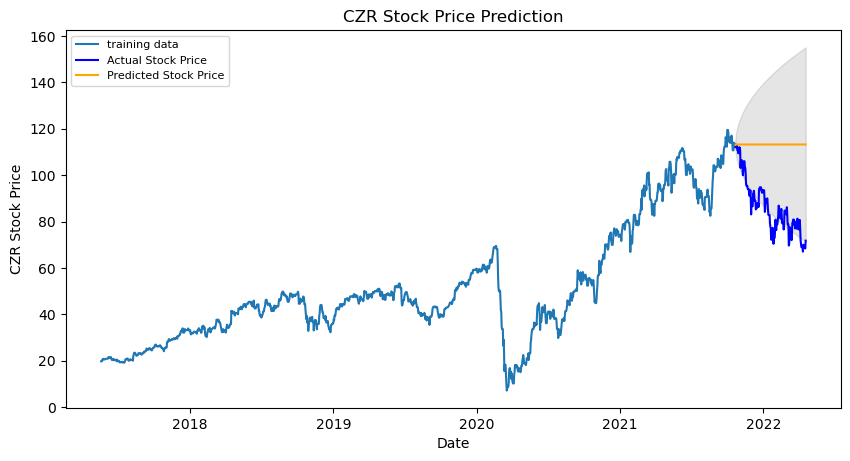

In [22]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('CZR Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('CZR Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()